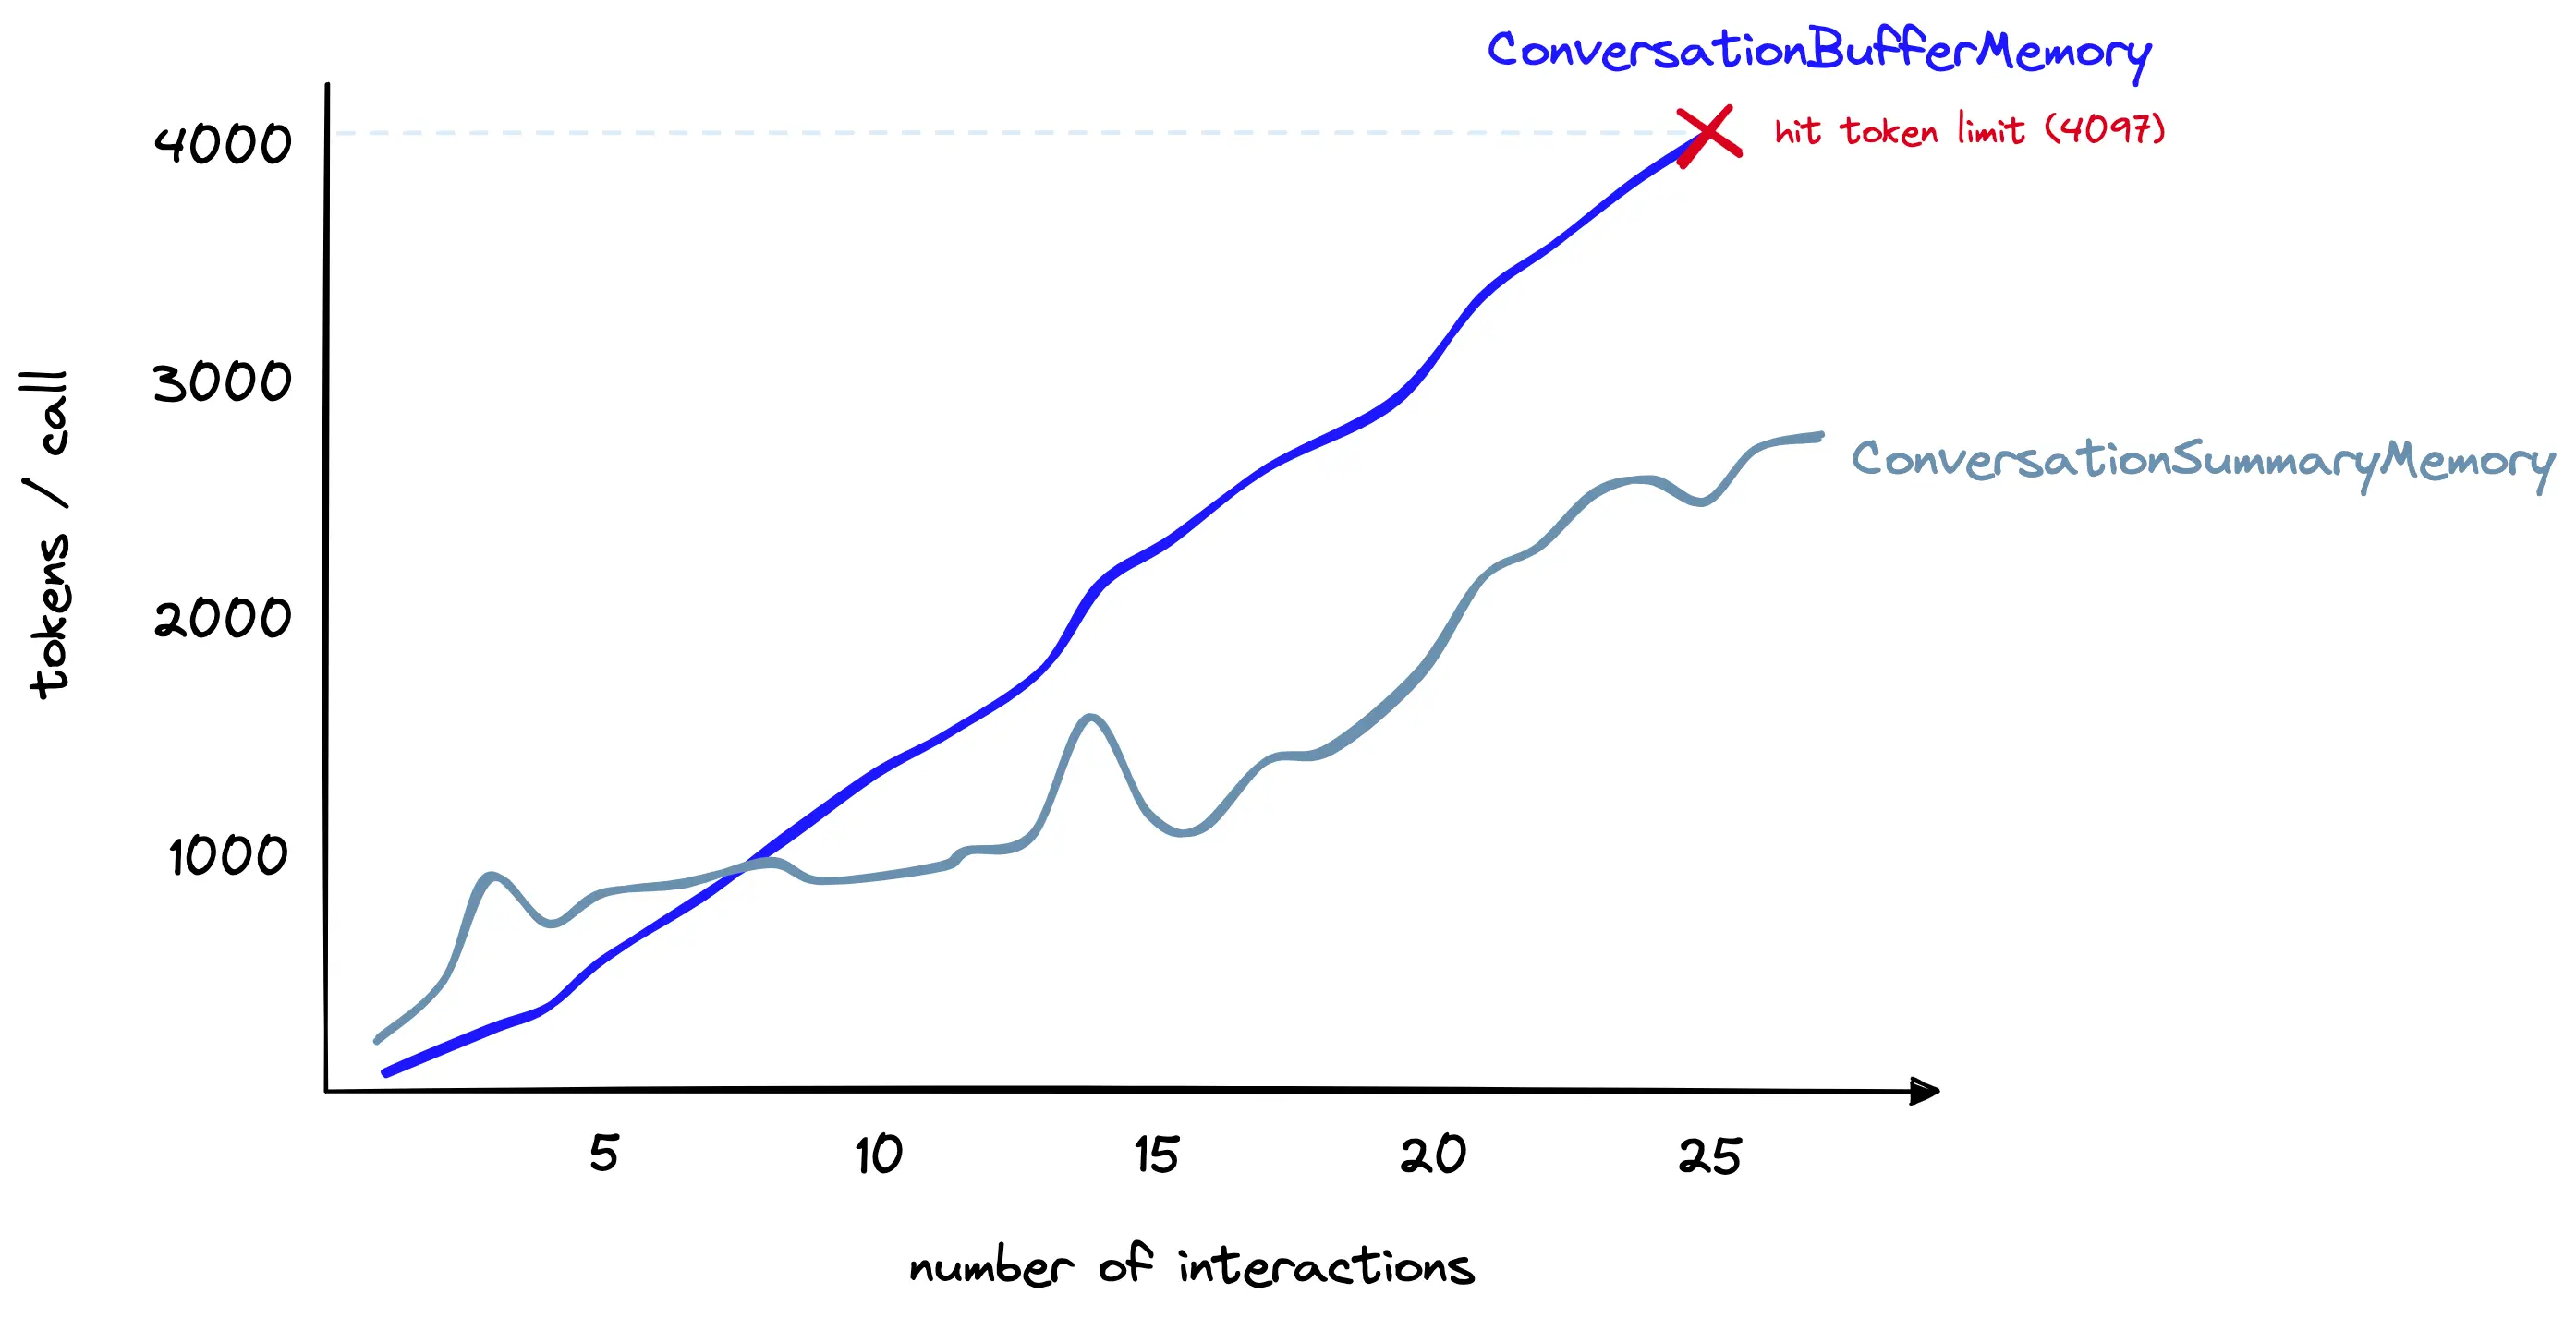

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
GROQ_API_KEY=os.getenv('GROQ_API_KEY')
os.environ["GROQ_API_KEY"] = GROQ_API_KEY

In [2]:
LANGCHAIN_API_KEY=os.getenv('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY

In [3]:
os.environ["LANGCHAIN_PROJECT"]="summerymemory"
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"

In [5]:
from langchain_groq import ChatGroq
model=ChatGroq(model_name="Gemma2-9b-It")

In [6]:
model.invoke("Hi, what's up?")

AIMessage(content="Not much, just hanging out in the digital world, waiting to be helpful! What about you? What's going on in your world today? 😄\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 16, 'total_tokens': 50, 'completion_time': 0.061818182, 'prompt_time': 9.108e-05, 'queue_time': 0.019858398, 'total_time': 0.061909262}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-088290ce-064b-4803-a5c5-0cb9aed3301b-0', usage_metadata={'input_tokens': 16, 'output_tokens': 34, 'total_tokens': 50})

In [7]:
from langchain.memory import ConversationSummaryMemory

In [8]:
from langchain.memory import ChatMessageHistory

In [12]:
memory = ConversationSummaryMemory(llm=model, return_messages=True)

In [13]:
memory

ConversationSummaryMemory(llm=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001BADB4F6410>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001BADC9CD5D0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********')), chat_memory=InMemoryChatMessageHistory(messages=[]), return_messages=True)

In [14]:
memory.save_context(
    {"input": "sam and steve are working on a hackathon project."},
    {"output": "That's awesome! What's the hackathon project about?"}
)

In [15]:

memory.load_memory_variables({})

{'history': [SystemMessage(content='Human mentions that Sam and Steve are working on a hackathon project. The AI expresses enthusiasm and asks for more details about the project.  \n\n', additional_kwargs={}, response_metadata={})]}

In [16]:

summary=memory.load_memory_variables({})

In [17]:
summary

{'history': [SystemMessage(content='Human mentions that Sam and Steve are working on a hackathon project. The AI expresses enthusiasm and asks for more details about the project.  \n\n', additional_kwargs={}, response_metadata={})]}

In [18]:

print(summary["history"][0].content)

Human mentions that Sam and Steve are working on a hackathon project. The AI expresses enthusiasm and asks for more details about the project.  




In [19]:
memory.save_context(
    {"input": "It's a machine learning project focused on healthcare."},
    {"output": "Sounds exciting! Are they building a prediction model or something else"}
)
memory.save_context(
    {"input": "Yes, they’re working on a model to predict patient outcomes."},
    {"output": "Impressive! How far along are they with the project?"}
)

In [20]:
memory.load_memory_variables({})

{'history': [SystemMessage(content="Human mentions that Sam and Steve are working on a hackathon project. The AI expresses enthusiasm and asks for more details about the project. The human says it's a machine learning project focused on healthcare, specifically a model to predict patient outcomes. The AI is impressed and asks how far along they are with the project.  \n", additional_kwargs={}, response_metadata={})]}

In [21]:
summary=memory.load_memory_variables({})

In [22]:
summary

{'history': [SystemMessage(content="Human mentions that Sam and Steve are working on a hackathon project. The AI expresses enthusiasm and asks for more details about the project. The human says it's a machine learning project focused on healthcare, specifically a model to predict patient outcomes. The AI is impressed and asks how far along they are with the project.  \n", additional_kwargs={}, response_metadata={})]}

In [23]:
memory.chat_memory

InMemoryChatMessageHistory(messages=[HumanMessage(content='sam and steve are working on a hackathon project.', additional_kwargs={}, response_metadata={}), AIMessage(content="That's awesome! What's the hackathon project about?", additional_kwargs={}, response_metadata={}), HumanMessage(content="It's a machine learning project focused on healthcare.", additional_kwargs={}, response_metadata={}), AIMessage(content='Sounds exciting! Are they building a prediction model or something else', additional_kwargs={}, response_metadata={}), HumanMessage(content='Yes, they’re working on a model to predict patient outcomes.', additional_kwargs={}, response_metadata={}), AIMessage(content='Impressive! How far along are they with the project?', additional_kwargs={}, response_metadata={})])

In [24]:
memory.chat_memory.messages

[HumanMessage(content='sam and steve are working on a hackathon project.', additional_kwargs={}, response_metadata={}),
 AIMessage(content="That's awesome! What's the hackathon project about?", additional_kwargs={}, response_metadata={}),
 HumanMessage(content="It's a machine learning project focused on healthcare.", additional_kwargs={}, response_metadata={}),
 AIMessage(content='Sounds exciting! Are they building a prediction model or something else', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Yes, they’re working on a model to predict patient outcomes.', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Impressive! How far along are they with the project?', additional_kwargs={}, response_metadata={})]

In [25]:
messages = memory.chat_memory.messages

In [26]:
messages

[HumanMessage(content='sam and steve are working on a hackathon project.', additional_kwargs={}, response_metadata={}),
 AIMessage(content="That's awesome! What's the hackathon project about?", additional_kwargs={}, response_metadata={}),
 HumanMessage(content="It's a machine learning project focused on healthcare.", additional_kwargs={}, response_metadata={}),
 AIMessage(content='Sounds exciting! Are they building a prediction model or something else', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Yes, they’re working on a model to predict patient outcomes.', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Impressive! How far along are they with the project?', additional_kwargs={}, response_metadata={})]

In [27]:
previous_summary=""

In [28]:
memory.predict_new_summary(messages, previous_summary)

"Human: sam and steve are working on a hackathon project.  AI: That's awesome! What's the hackathon project about?\n\nNew summary: \nA human tells the AI that Sam and Steve are working on a hackathon project. The AI expresses enthusiasm and asks what the project is about.  The human responds that it's a machine learning project focused on healthcare. \n\n\n\n"

In [29]:
history = ChatMessageHistory()

In [30]:
history.add_user_message("Hi")

In [31]:
history

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi', additional_kwargs={}, response_metadata={})])

In [32]:
history.add_ai_message("Hello, how can I assist you today?")

In [33]:
history

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello, how can I assist you today?', additional_kwargs={}, response_metadata={})])

In [35]:
memory = ConversationSummaryMemory.from_messages(
    llm=model,
    chat_memory=history,
    memory_key="summary",
    human_prefix="User",
    ai_prefix="AI"
)

In [36]:
memory

ConversationSummaryMemory(human_prefix='User', llm=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001BADB4F6410>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001BADC9CD5D0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********')), chat_memory=InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello, how can I assist you today?', additional_kwargs={}, response_metadata={})]), buffer='New summary: A user greets the AI and the AI responds with a polite greeting and an offer of assistance. \n', memory_key='summary')

In [37]:
memory.buffer

'New summary: A user greets the AI and the AI responds with a polite greeting and an offer of assistance. \n'

In [38]:

from langchain.chains import ConversationChain
conversation_with_summary = ConversationChain(
    llm=model,
    memory=ConversationSummaryMemory(llm=model),
    verbose=True
)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14488\1651955162.py:2: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html` instead.
  conversation_with_summary = ConversationChain(


In [39]:
conversation_with_summary

ConversationChain(memory=ConversationSummaryMemory(llm=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001BADB4F6410>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001BADC9CD5D0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********')), chat_memory=InMemoryChatMessageHistory(messages=[])), verbose=True, llm=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001BADB4F6410>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001BADC9CD5D0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********')), output_parser=StrOutputParser(), llm_kwargs={})

In [40]:
conversation_with_summary.predict(input="Hi, what's up?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, what's up?
AI:

> Finished chain.


"Hi there! Not much, just processing information and waiting to be helpful. What about you?  What's going on in your world today? 😄  \n"

In [41]:
conversation_with_summary.predict(input="Sam and steve are working on a mlops production ready project.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
New summary: 
The human greets the AI and asks what it's up to. The AI replies that it's processing information and waiting to be helpful, and asks the human what's going on in their world.  

Human: Sam and steve are working on a mlops production ready project.
AI:

> Finished chain.


"That's fascinating! MLOps is such a hot topic right now.  \n\nCan you tell me more about what kind of project Sam and Steve are working on?  What kind of machine learning models are they using? And what are some of the challenges they're facing in making it production-ready? \n\nI'm always eager to learn about real-world applications of AI.  \n\n"

In [42]:
conversation_with_summary.predict(input="It's project focused on healthcare.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
The human greets the AI and asks what it's up to. The AI replies that it's processing information and waiting to be helpful, and asks the human what's going on in their world. The human tells the AI that Sam and Steve are working on a MLOps production-ready project. The AI expresses interest in the project and asks for more details about the type of models used, the challenges they face, and the specific application.  

Human: It's project focused on healthcare.
AI:

> Finished chain.


"That's fascinating! Healthcare is such a dynamic field with so much potential for AI.  Can you tell me more about the specific area of healthcare this project focuses on?  For example, is it related to diagnostics, treatment planning, drug discovery, or something else entirely? \n\nAlso, what kind of machine learning models are Sam and Steve using? Are they working with image recognition, natural language processing, or another type of model?  \n\nI'm eager to hear more about the challenges they're facing in making this project production-ready. Deployment in healthcare often comes with unique considerations regarding data privacy, security, and regulatory compliance.  \n\n"

In [43]:
conversation_with_summary.predict(input="so can you describe mlops pipeline to me with in six point.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
The human greets the AI and asks what it's up to. The AI replies that it's processing information and waiting to be helpful, and asks the human what's going on in their world. The human tells the AI that Sam and Steve are working on a MLOps production-ready project focused on healthcare. The AI expresses interest in the project and asks for more details about the type of models used, the challenges they face, and the specific application. The human tells the AI that the project is focused on healthcare. The AI, intrigued by the healthcare focus, asks for more specifics about the project's area of focus within healthcare (e.g., diagnostics, treatment planning) and the t

"You got it! Here's a description of an MLOps pipeline in six points:\n\n1. **Data Collection & Preparation:** Gathering raw data from various sources and cleaning, transforming, and preparing it for training machine learning models. \n2. **Model Development:**  Designing, training, and evaluating different machine learning models to achieve the desired performance for the specific task. \n3. **Model Deployment:**  Putting the chosen model into a production environment where it can be used to make predictions on real-world data. This often involves containerization and orchestration tools.\n4. **Monitoring & Logging:** Continuously tracking the performance of the deployed model in production, identifying any issues or anomalies, and logging relevant metrics.\n5. **Feedback Loop:** Using the monitoring data to identify areas for improvement, retraining models with updated data, and iteratively refining the pipeline.\n6. **Version Control & Collaboration:**  Managing different versions o

In [44]:
conversation_with_summary.predict(input="How many total points are there?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
The human greets the AI and asks what it's up to. The AI replies that it's processing information and waiting to be helpful, and asks the human what's going on in their world. The human tells the AI that Sam and Steve are working on a MLOps production-ready project focused on healthcare. The AI expresses interest in the project and asks for more details about the type of models used, the challenges they face, and the specific application. The human tells the AI that the project is focused on healthcare. The AI, intrigued by the healthcare focus, asks for more specifics about the project's area of focus within healthcare (e.g., diagnostics, treatment planning) and the t

'There are **six** points in the MLOps pipeline I described.  \n\n'

In [45]:
conversation_with_summary.predict(input="can you give me 5th point with explaination")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
The human greets the AI and asks what it's up to. The AI replies that it's processing information and waiting to be helpful, and asks the human what's going on in their world. The human tells the AI that Sam and Steve are working on a MLOps production-ready project focused on healthcare. The AI expresses interest in the project and asks for more details about the type of models used, the challenges they face, and the specific application. The human tells the AI that the project is focused on healthcare. The AI, intrigued by the healthcare focus, asks for more specifics about the project's area of focus within healthcare (e.g., diagnostics, treatment planning) and the t

"Certainly! \n\nThe fifth point in an MLOps pipeline is **Model Monitoring & Evaluation**.  This stage is crucial for ensuring the model continues to perform well in the real world. \n\nHere's a breakdown:\n\n* **Continuous Performance Tracking:**  The model's performance metrics (accuracy, precision, recall, etc.) are constantly monitored against predefined benchmarks.  Any significant drops in performance signal a potential issue.\n* **Drift Detection:**  This involves identifying changes in the input data distribution or the model's behavior over time.  Data drift means the model might be less effective because the patterns it learned are no longer relevant.  \n* **Alerting & Remediation:**  When performance issues or drift are detected, automated alerts are triggered.  This allows the team to investigate the cause and take corrective actions, such as retraining the model with updated data or adjusting model parameters.\n\nEssentially, model monitoring and evaluation keep a watchful

In [46]:
conversation_with_summary.memory.buffer

"The human greets the AI and asks what it's up to. The AI replies that it's processing information and waiting to be helpful, and asks the human what's going on in their world. The human tells the AI that Sam and Steve are working on a MLOps production-ready project focused on healthcare. The AI expresses interest in the project and asks for more details about the type of models used, the challenges they face, and the specific application. The human tells the AI that the project is focused on healthcare. The AI, intrigued by the healthcare focus, asks for more specifics about the project's area of focus within healthcare (e.g., diagnostics, treatment planning) and the type of machine learning models being used (e.g., image recognition, natural language processing). It also expresses interest in the challenges Sam and Steve are facing in making the project production-ready, particularly regarding data privacy, security, and regulatory compliance.  The human then asks the AI to describe 

Conversation Summary Buffer Memory

While summary is good, we know that recent conversation has high correlation to upcoming query and

A summary of old conversation with a buffer memory of last few conversation would be a good combination. This class exactly does that.

You can set the token limit which define how much historical conversation to be kept along with the summary. Higher the token size more the exact conversation history kept as-it-is.

In [47]:

from langchain.memory import ConversationSummaryBufferMemory

In [48]:
memory2 = ConversationSummaryBufferMemory(llm=model,return_messages=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14488\2773740349.py:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory2 = ConversationSummaryBufferMemory(llm=model,return_messages=True)


In [49]:
memory2

ConversationSummaryBufferMemory(llm=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001BADB4F6410>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001BADC9CD5D0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********')), chat_memory=InMemoryChatMessageHistory(messages=[]), return_messages=True)

In [50]:

memory2.save_context(
    {"input": "It's a machine learning project focused on healthcare."},
    {"output": "Sounds exciting! Are they building a prediction model or something else"}
)
memory2.save_context(
    {"input": "Yes, they’re working on a model to predict patient outcomes."},
    {"output": "Impressive! How far along are they with the project?"}
)

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lenovo\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this 

In [51]:

memory2.load_memory_variables({})

{'history': [HumanMessage(content="It's a machine learning project focused on healthcare.", additional_kwargs={}, response_metadata={}),
  AIMessage(content='Sounds exciting! Are they building a prediction model or something else', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='Yes, they’re working on a model to predict patient outcomes.', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Impressive! How far along are they with the project?', additional_kwargs={}, response_metadata={})]}

In [52]:
memory3 = ConversationSummaryBufferMemory(llm=model,return_messages=True,max_token_limit=50)

In [53]:
memory3

ConversationSummaryBufferMemory(llm=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001BADB4F6410>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001BADC9CD5D0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********')), chat_memory=InMemoryChatMessageHistory(messages=[]), return_messages=True, max_token_limit=50)

In [54]:

memory3.save_context(
    {"input": "Sunny and Mayank are working on a hackathon project."},
    {"output": "That's awesome! What's the hackathon project about?"}
)
memory3.save_context(
    {"input": "It's a machine learning project focused on healthcare."},
    {"output": "Sounds exciting! Are they building a prediction model or something else?"}
)
memory3.save_context(
    {"input": "Yes, they’re working on a model to predict patient outcomes."},
    {"output": "Impressive! Wishing Sunny and Mayank all the best for their project."}
)

In [55]:
memory3.load_memory_variables({})["history"]

[SystemMessage(content="Human: Sunny and Mayank are working on a hackathon project. It's a machine learning project focused on healthcare.  \n", additional_kwargs={}, response_metadata={}),
 AIMessage(content='Sounds exciting! Are they building a prediction model or something else?', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Yes, they’re working on a model to predict patient outcomes.', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Impressive! Wishing Sunny and Mayank all the best for their project.', additional_kwargs={}, response_metadata={})]

In [56]:
memory3.load_memory_variables({})["history"][0].content

"Human: Sunny and Mayank are working on a hackathon project. It's a machine learning project focused on healthcare.  \n"

In [57]:
memory4 = ConversationSummaryBufferMemory(llm=model,return_messages=True,max_token_limit=20) # summary token limit 20

In [58]:
memory4.save_context(
    {"input": "Sunny and Mayank are working on a hackathon project."},
    {"output": "That's awesome! What's the hackathon project about?"}
)
memory4.save_context(
    {"input": "It's a machine learning project focused on healthcare."},
    {"output": "Sounds exciting! Are they building a prediction model or something else?"}
)
memory4.save_context(
    {"input": "Yes, they’re working on a model to predict patient outcomes."},
    {"output": "Impressive! Wishing Sunny and Mayank all the best for their project."}
)

In [59]:
memory4.load_memory_variables({})

{'history': [SystemMessage(content='Human mentions that Sunny and Mayank are working on a hackathon project focused on healthcare using machine learning. The AI expresses excitement about the project. The AI asks if they are building a prediction model and the human confirms they are working on a model to predict patient outcomes. \n', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Impressive! Wishing Sunny and Mayank all the best for their project.', additional_kwargs={}, response_metadata={})]}

In [60]:

from langchain.chains import ConversationChain

conversation_with_summary = ConversationChain(
    llm=model,
    # We set a very low max_token_limit for the purposes of testing.
    memory=ConversationSummaryBufferMemory(llm=model, max_token_limit=40),
    verbose=True,
)
conversation_with_summary.predict(input="Hi, what's up?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, what's up?
AI:

> Finished chain.


"Hi there! Not much, just processing information and waiting for interesting conversations like this one. What about you? What's going on in your world today?  \n\n"

In [61]:
conversation_with_summary.predict(input="Just working on writing some documentation on machine learning!")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: New summary: The human greets the AI with a casual "Hi, what's up?". 

AI: Hi there! Not much, just processing information and waiting for interesting conversations like this one. What about you? What's going on in your world today?  


Human: Just working on writing some documentation on machine learning!
AI:

> Finished chain.


"That's fascinating!  I'm always eager to learn more about how humans are using me and my fellow AI models.  What kind of documentation are you working on specifically?  \n\nIs it for beginners, or geared towards people who are already familiar with the field?  \n\nI can access and process a vast amount of information about machine learning, so if you have any questions or need help finding specific details, just ask! \n\n"

In [62]:
conversation_with_summary.predict(input="give me some points for writing about the document")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: The human greets the AI with a casual "Hi, what's up?". The AI responds enthusiastically, stating it's processing information and waiting for interesting conversations. The human mentions working on documentation for machine learning, which the AI finds fascinating. The AI expresses its eagerness to learn more about how humans are using it and asks for details about the documentation, offering its assistance if needed. 

Human: give me some points for writing about the document
AI:

> Finished chain.


"That's a great idea!  I'd love to help you brainstorm. Since you're writing documentation for machine learning, it's important to consider your audience.  \n\nHere are some points to get you started, depending on who you're writing for:\n\n**For Beginners:**\n\n* **What is Machine Learning?** Start with a clear and concise definition, maybe even use an analogy to make it relatable. \n* **Types of Machine Learning:** Briefly explain supervised, unsupervised, and reinforcement learning with simple examples.\n* **Applications of Machine Learning:** Highlight real-world examples that people can easily understand, like image recognition, spam filters, or recommendation systems.\n\n**For Intermediate/Advanced Users:**\n\n* **Different Algorithms:**  Discuss popular algorithms like linear regression, decision trees, or neural networks, explaining their strengths and weaknesses.\n* **Model Training and Evaluation:** Explain the process of training a machine learning model and how to evaluate 

In [63]:

conversation_with_summary.predict(input="can you list out the resources from the previous message")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: The human greets the AI with a casual "Hi, what's up?". The AI responds enthusiastically, stating it's processing information and waiting for interesting conversations. The human mentions working on documentation for machine learning, which the AI finds fascinating. The AI expresses its eagerness to learn more about how humans are using it and asks for details about the documentation, offering its assistance if needed.  The human then asks the AI for points to help with writing the documentation. The AI provides a structured list of points to consider, tailored to different audience levels (beginners, intermediate/advanced, and general) and including tips for c

"You're asking for resources mentioned in the previous message.  \n\nTo be helpful, I need to remember what was said.  Unfortunately, as a large language model, I don't have memory of past conversations. Each interaction starts fresh. \n\nCan you please remind me what resources you're looking for? I'm happy to help if I can! \n\n"